# 코로나 데이터 시각화 AI 경진대회

## 0.필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.font_manager as fm 
fm._rebuild()

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf'),
 ('NanumBarunGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'),
 ('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundB.ttf'),
 ('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'),
 ('NanumMyeongjo',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoBold.ttf'),
 ('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'),
 ('NanumSquare',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareB.ttf

## 데이터 설명

### 1. The Lists of Data Table
---

#### 0. 데이터 읽어오기

In [2]:
case = pd.read_csv("./archive/Case.csv")
pati_info = pd.read_csv("./archive/PatientInfo.csv")
policy = pd.read_csv("./archive/Policy.csv")
region = pd.read_csv("./archive/Region.csv")
search_trend = pd.read_csv("./archive/SearchTrend.csv")
seoul_floating = pd.read_csv("./archive/SeoulFloating.csv")
time = pd.read_csv("./archive/Time.csv")
time_age = pd.read_csv("./archive/TimeAge.csv")
time_gender = pd.read_csv("./archive/TimeGender.csv")
time_province = pd.read_csv("./archive/TimeProvince.csv")
weather = pd.read_csv("./archive/Weather.csv")

#### 1. Case Data
* __Case__: 대한민국의 COVID-19 감염사례 데이터
    - __case_id__: 감염사례 ID
        - case_id(7) = 지역코드(5) + 감염 번호(2)
    - __province__: 지역(특별시, 광역시, 도)
    - __city__: 도시(시, 군, 구)
    - __group__: True=집단감염, False=집단감염 아님
    - __infection_case__: 감염사례(`overseas inflow`=해외유입, `etc`=조사중
    - __confirmed__: 확진자 합계
    - __latitude__: 발생 지점 위도
    - __longitude__: 발생 지점 경도

In [3]:
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


#### 2. Patient Data

* __PatientInfo__: 대한민국 내 COVID-19 환자의 데이터
    - __patient_id__: 환자 ID
        - patient_id(10) = 지역코드(5) + 환자 번호(5)
    - __sex__: 환자 성별
    - __age__: 환자 나이대
    - __country__: 환자 국적
    - __province__: 환자 지역(특별시, 광역시, 도)
    - __city__: 환자 도시(시, 군, 구)
    - __infection_case__: 감염 사례
    - __infected_by__: 환자를 감염시킨 사람의 ID
    - __contact_number__: 다른 사람과의 접촉 횟수
    - __symptom_onset_date__: 증상 발생일
    - __confirmed_date__: 확진일
    - __released_date__: 완치일
    - __deceased_date__: 사망일
    - __state__: 현재 상태
        - isolated(확진) / released(완치) / deceased(사망)

In [4]:
pati_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


#### 3. Time Series Data

* __Time__: 대한민국 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __test__: 검사 총합
    - __negative__: 음성 판정 총합
    - __confirmed__: 양성 판정 총합
    - __released__: 완치자 총합
    - __deceased__: 사망자 총합

In [5]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


* __TimeAge__: 대한민국 연령별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __age__: 환자의 나이대
    - __confirmed__: 연령별 확진자 총합
    - __deceased__: 연령별 사망자 총합

In [6]:
time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


* __TimeGender__: 대한민국 성별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __sex__: 환자의 성별
    - __confirmed__: 성별 확진자 총합
    - __deceased__: 성별 사망자 총합

In [7]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


* __TimeProvince__: 대한민국 지역별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __province__: 지역(특별시, 광역시, 도)
    - __confirmed__: 지역별 확진자 총합
    - __deceased__: 지역별 사망자 총합

In [8]:
time_province

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


#### 4. Additional Data

* __Region__: 대한민국 지역별 위치와 통계자료
    - __code__: 지역 코드
    - __province__: 지역(특별시, 광역시, 도)
    - __city__: 도시(시, 군, 구)
    - __latitude__: 지점 위도
    - __longitude__: 지점 경도
    - __elementary_school_count__: 초등학교 수
    - __kindergarten_count__: 유치원 수
    - __university_count__: 대학교 
    - __academy_ratio__: 학원 비율
    - __elderly_population_ratio__: 노인 인구 비율
    - __elderly_alone_ratio__: 독거 노인 비율
    - __nursing_home_count__: 양로원 수

In [9]:
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


* __Weather__: 대한민국 지역별 기상정보
    - __code__: 지역 코드
    - __province__: 지역(특별시, 광역시, 도)
    - __date__: YYYY-MM-DD
    - __avg_temp__: 평균 기온
    - __min_temp__: 최저 기온
    - __max_temp__: 최대 기온
    - __precipitation__: 강수량
    - __max_wind_speed__: 최대 풍속
    - __most_wind_direction__: 많이 분 바람의 방향
    - __avg_relative_humidity__: 평균 상대습도

In [10]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


* __SearchTrend__: `cold` `flu` `pneumonia` `coronavirus` 의 검색어 추이 (네이버)
    - __date__: YYYY-MM-DD
    - __cold__: 감기의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __flu__: 독감의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __pneumonia__: 폐렴의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __coronavirus__: 코로나바이러스 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.

In [11]:
search_trend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


* __policy__: 정책 데이터
    - __policy_id__: 정책 ID
    - __country__: 정책 시행 국가
    - __type__: 정책 종류
    - __gov_policy__: 정부의 정책
    - __detail__: 정책 설명
    - __start_date__: 시작 날짜
    - __end_date__: 종료 날짜

In [12]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


* __seoul_floating__: 서울시내 유동인구
    - __date__: YYYY-MM-DD
    - __hour__: 시간
        - 1시간 단위로 0-23시로 세분화.
    - __birth_year__: 나이대
        - 10세 단위로 6개 연령대(20대, 30대, 40대, 50대, 60대, 70대 이상)로 세분화
    - __sex__: 성별
    - __province__: 지역(전부 서울)
    - __city__: 도시(구)
    - __fp_num__: 유동인구수

In [13]:
seoul_floating

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


## 확진자 관련 그래프 그려보기

In [14]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


### 누적확진자, 완치자, 사망자수

In [15]:
df_test = time.pivot_table(index='date', values=['test', 'negative', 'confirmed', 'released', 'deceased'], aggfunc=np.sum).reset_index()
df_test

,date,confirmed,deceased,negative,released,test
0,2020-01-20,1,0,0,0,1
1,2020-01-21,1,0,0,0,1
2,2020-01-22,1,0,3,0,4
3,2020-01-23,1,0,21,0,22
4,2020-01-24,2,0,25,0,27
...,...,...,...,...,...,...
158,2020-06-26,12602,282,1200885,11172,1232315
159,2020-06-27,12653,282,1211261,11317,1243780
160,2020-06-28,12715,282,1219975,11364,1251695
161,2020-06-29,12757,282,1228698,11429,1259954


In [16]:
# plt.style.use('ggplot')
# plt.figure(figsize=(80,50), dpi=300)
# plt.xticks(rotation=90, fontsize=100)
# plt.rc('font', family = 'NanumGothic', size=30) 
# plt.title('확진자수, 완치자수, 사망자수 추이', fontsize=200) # 제목 추가
# # plt.plot(time['date'], time['test'], label = 'test') # 검사자수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['confirmed'], label = 'confirmed') # 확진자 수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['released'], label = 'released') # 완치자 수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['deceased'], label = 'deceased') # 사망자 수를 꺽은선 그래프로 표현
# plt.xlabel('date', fontsize=100)
# plt.legend(fontsize=100)
# plt.show()

1. 날씨가 추울수록 또는 건조할 수록 코로나 전파가 잘되는가? (https://www.monews.co.kr/news/articleView.html?idxno=209830)
2. 코로나는 누구에게 가장 위험할까? (https://m.health.chosun.com/svc/news_view.html?contid=2020102102119)
3. 정책의 효과는 어떨까?(특히 사회적 거리두기의 효과가 있을까? 없을까?) (https://dacon.io/codeshare/1003?page=1&dtype=recent&s_id=0)
    * level(Blue level, Yellow level, Orange level, Red level)
    * 사회적 거리두기
    * 해외입국자 2주자가격리
4. 20대 확진이 가장 많은 것의 요인은 무엇일까?(http://www.hani.co.kr/arti/society/health/930768.html)
5. 코로나 발병률, 사망률과 고령화 지역의 관계는?
6. 어떤 성별이 코로나에 취약할까?
7. 코로나 검색량이 서울 내 유동인구에 영향이 있을까?
8. 코로나 확진 판단이 늦어지면 사망 확률이 증가할까?
9. 나이가 많을 수록 완치 기간이 오래걸릴까?
10. 양로원 환자가 많은 지역이 코로나 발병률이 높은가?
11. 어린이 코로나 환자수(혹은 비율)가 많은 지역은 초등학교와 유치원이 많은가?
12. 신천지가 없었다면 코로나는 어떻게 되었을까?
13. 남자와 여자중 감염시킨 사람이 많은 집단은 어디일까?
14. 해외 유입 확진자의 위험성은 어떤가?
15. 청소년 코로나 환자수가 많은 지역은 학원들이 많은가?
16. 백신을 맞고 사망자가 늘고 있다는데, 사실일까?
17. 무증상 환자는 사망률이 높을까? (일반 환자보다 검사 받은 시간이 길 것 같아서)
18. 가장 대처를 잘한 확진자는 누구일까?
19. 코로나 초기에 다른 정책을 폈다면, 코로나가 없었을 수도 있지 않을까? 

In [17]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [18]:
df_weather = weather.loc[:, ['province', 'date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'avg_relative_humidity']]

df_weather

,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity
0,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,73.0
1,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,52.1
2,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,70.5
3,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,73.1
4,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,83.9
...,...,...,...,...,...,...,...,...
26266,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,85.1
26267,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,97.9
26268,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,90.9
26269,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,85.0


In [19]:
df_weather = df_weather[df_weather['province'].isin(['Seoul'])]

df_weather

,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity
0,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,73.0
16,Seoul,2016-01-02,5.7,1.0,9.5,0.0,4.5,76.9
32,Seoul,2016-01-03,6.5,5.1,9.4,0.0,4.0,80.6
48,Seoul,2016-01-04,2.0,-2.5,5.3,0.0,5.1,54.4
64,Seoul,2016-01-05,-2.7,-4.8,1.5,0.0,4.6,39.4
...,...,...,...,...,...,...,...,...
26191,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,91.0
26207,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,82.1
26223,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,70.4
26239,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,70.5


In [20]:
df_weather = df_weather.query('date.str.contains("2020")')
df_weather.reset_index(inplace=True)

df_weather

,index,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity
0,23375,Seoul,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,64.4
1,23391,Seoul,2020-01-02,1.0,-0.7,3.8,0.0,4.0,65.4
2,23407,Seoul,2020-01-03,-0.1,-3.4,4.6,0.0,3.5,56.9
3,23423,Seoul,2020-01-04,1.2,-2.8,6.1,0.0,4.5,50.8
4,23439,Seoul,2020-01-05,1.3,-3.2,6.6,0.0,2.9,45.6
...,...,...,...,...,...,...,...,...,...
176,26191,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,91.0
177,26207,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,82.1
178,26223,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,70.4
179,26239,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,70.5


In [21]:
df_weather = df_weather.loc[19:]
df_weather = df_weather.drop(['index'], axis=1)
df_weather.reset_index(inplace=True)
df_weather = df_weather.drop(['index'], axis=1)

df_weather

,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity
0,Seoul,2020-01-20,0.7,-3.3,5.5,0.0,5.7,46.8
1,Seoul,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,36.9
2,Seoul,2020-01-22,3.0,-0.1,7.8,0.0,3.2,36.0
3,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,49.3
4,Seoul,2020-01-24,2.8,-1.3,7.4,0.0,3.7,63.0
...,...,...,...,...,...,...,...,...
157,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,91.0
158,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,82.1
159,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,70.4
160,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,70.5


In [22]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [23]:
df_time = time.loc[:, ['confirmed']]

df_time

,confirmed
0,1
1,1
2,1
3,1
4,2
...,...
158,12602
159,12653
160,12715
161,12757


In [24]:
weather_time = pd.concat([df_weather,df_time],axis=1)
weather_time = weather_time.loc[:, ['date', 'avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'avg_relative_humidity', 'confirmed']]
weather_time

,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity,confirmed
0,2020-01-20,0.7,-3.3,5.5,0.0,5.7,46.8,1
1,2020-01-21,-0.4,-5.6,5.5,0.0,3.5,36.9,1
2,2020-01-22,3.0,-0.1,7.8,0.0,3.2,36.0,1
3,2020-01-23,4.6,0.0,9.9,0.0,4.7,49.3,1
4,2020-01-24,2.8,-1.3,7.4,0.0,3.7,63.0,2
...,...,...,...,...,...,...,...,...
158,2020-06-26,21.8,19.2,25.7,2.1,5.3,82.1,12602
159,2020-06-27,24.1,20.4,29.6,0.0,5.4,70.4,12653
160,2020-06-28,25.2,21.5,30.1,0.0,4.7,70.5,12715
161,2020-06-29,23.8,20.6,26.5,11.9,5.9,77.0,12757


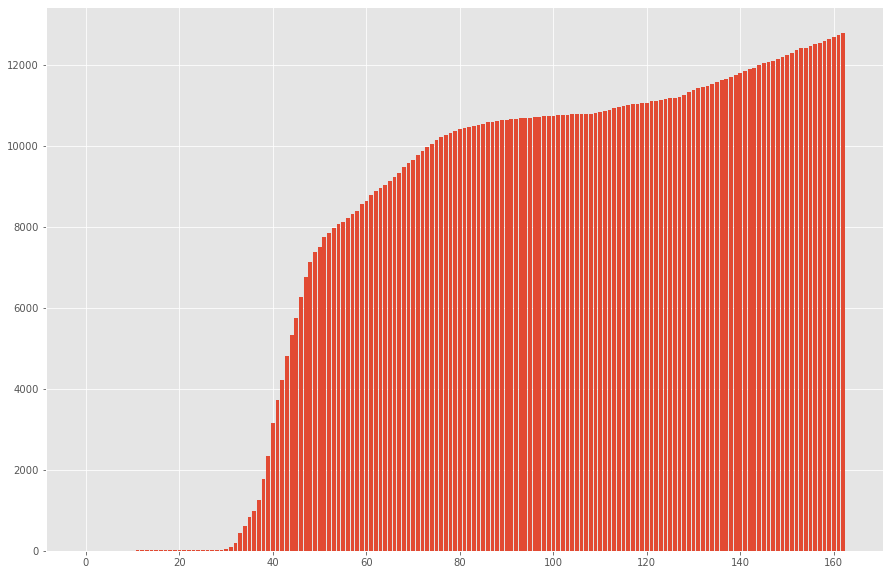

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.bar(range(len(weather_time['confirmed'])), weather_time['confirmed'])
plt.show()